# DATA LOADING

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
training_data = pd.read_csv("/content/df_train_output.csv")
training_data

,complaint_what_happened,Topic
0,good morning my name is xxxx xxxx and i apprec...,Retail Banking Operations
1,i upgraded my xxxx xxxx card in and was told ...,Credit card Management
2,chase card was reported on however fraudulent...,Credit card Management
3,on while trying to book a xxxx xxxx ticket ...,Credit card Management
4,my grand son give me check for i deposit it i...,Retail Banking Operations
...,...,...
21067,after being a chase card customer for well ove...,Credit card Management
21068,on wednesday xxxxxxxx i called chas my xxxx xx...,Dispute reporting
21069,i am not familiar with xxxx pay and did not un...,Dispute reporting
21070,i have had flawless credit for yrs ive had ch...,Payment and Billing


In [ ]:
training_data.shape

(21072, 2)

In [ ]:
training_data = training_data[~training_data['complaint_what_happened'].isnull()]

In [ ]:
training_data.shape

(21069, 2)

# PREROCESSING

In [ ]:
import pickle
vect = CountVectorizer()
X_train_cnt = vect.fit_transform(training_data['complaint_what_happened'])

In [ ]:
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_cnt)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X_train_tfidf, training_data['Topic'], test_size=0.25, random_state=42)

# MODEL TRAINING AND TESTING

1. Logistic regression



In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=42, solver='liblinear').fit(X_train, y_train)
logreg.score(X_test, y_test)

0.9198936977980258

confusion_matrix: The cell at row i and column j represents the number of instances where the true label was class i, but the model predicted class j.

In [ ]:
y_pred = logreg.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))

logreg_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", logreg_accuracy)

[[1153   43    4    9   24]
 [  44 1069   14    7   51]
 [  24   16  886    3   27]
 [  19   21   28  483   27]
 [  15   38    8    0 1255]]
                           precision    recall  f1-score   support

   Credit card Management       0.92      0.94      0.93      1233
        Dispute reporting       0.90      0.90      0.90      1185
          Mortgages/loans       0.94      0.93      0.93       956
      Payment and Billing       0.96      0.84      0.89       578
Retail Banking Operations       0.91      0.95      0.93      1316

                 accuracy                           0.92      5268
                macro avg       0.93      0.91      0.92      5268
             weighted avg       0.92      0.92      0.92      5268

Accuracy: 0.9198936977980258


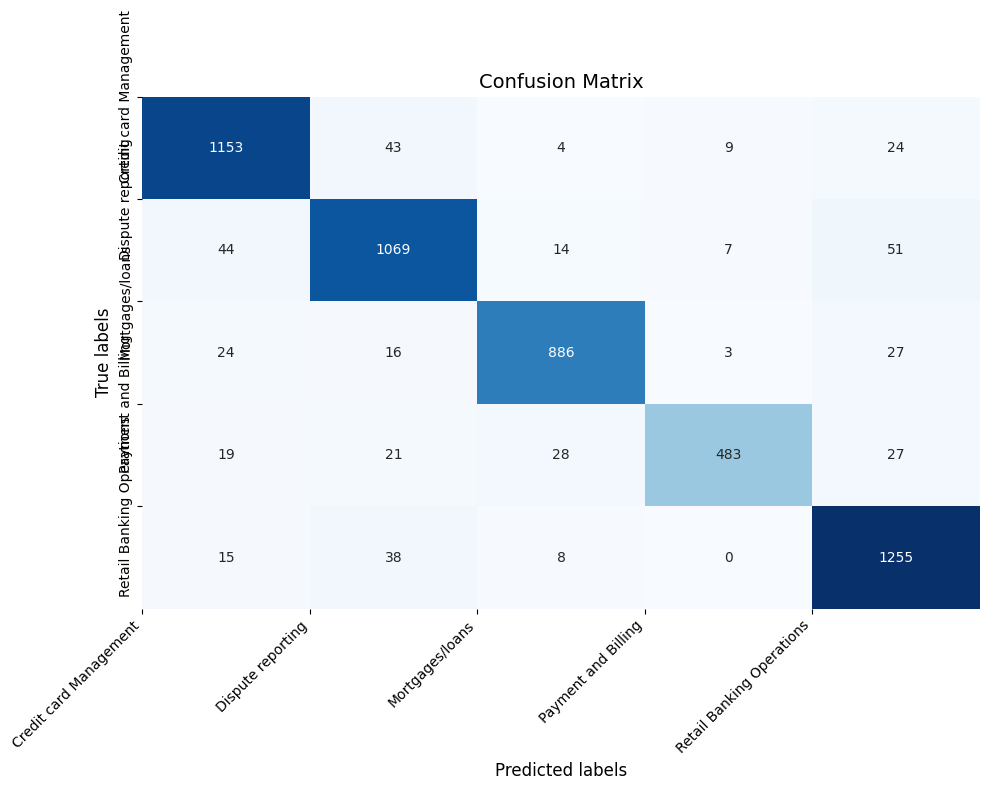

In [ ]:
plt.figure(figsize=(10, 8))  # Increase figure size

# Plot confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)

plt.xlabel('Predicted labels', fontsize=12)  # Increase label font size
plt.ylabel('True labels', fontsize=12)  # Increase label font size
plt.title('Confusion Matrix', fontsize=14)  # Increase title font size

class_names = ['Credit card Management', 'Dispute reporting', 'Mortgages/loans', 'Payment and Billing', 'Retail Banking Operations']
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45, ha='right', fontsize=10)  # Rotate and align x-axis tick labels
plt.yticks(tick_marks, class_names, fontsize=10)  # Increase y-axis tick label font size

# Show plot
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


2. Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)
dt.score(X_test, y_test)

0.7843583902809416

In [ ]:
y_pred = dt.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))

dt_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", dt_accuracy)

[[1023  105   34   22   49]
 [ 116  862   52   41  114]
 [  39   48  773   41   55]
 [  26   36   60  415   41]
 [  45  132   47   33 1059]]
                           precision    recall  f1-score   support

   Credit card Management       0.82      0.83      0.82      1233
        Dispute reporting       0.73      0.73      0.73      1185
          Mortgages/loans       0.80      0.81      0.80       956
      Payment and Billing       0.75      0.72      0.73       578
Retail Banking Operations       0.80      0.80      0.80      1316

                 accuracy                           0.78      5268
                macro avg       0.78      0.78      0.78      5268
             weighted avg       0.78      0.78      0.78      5268

Accuracy: 0.7843583902809416


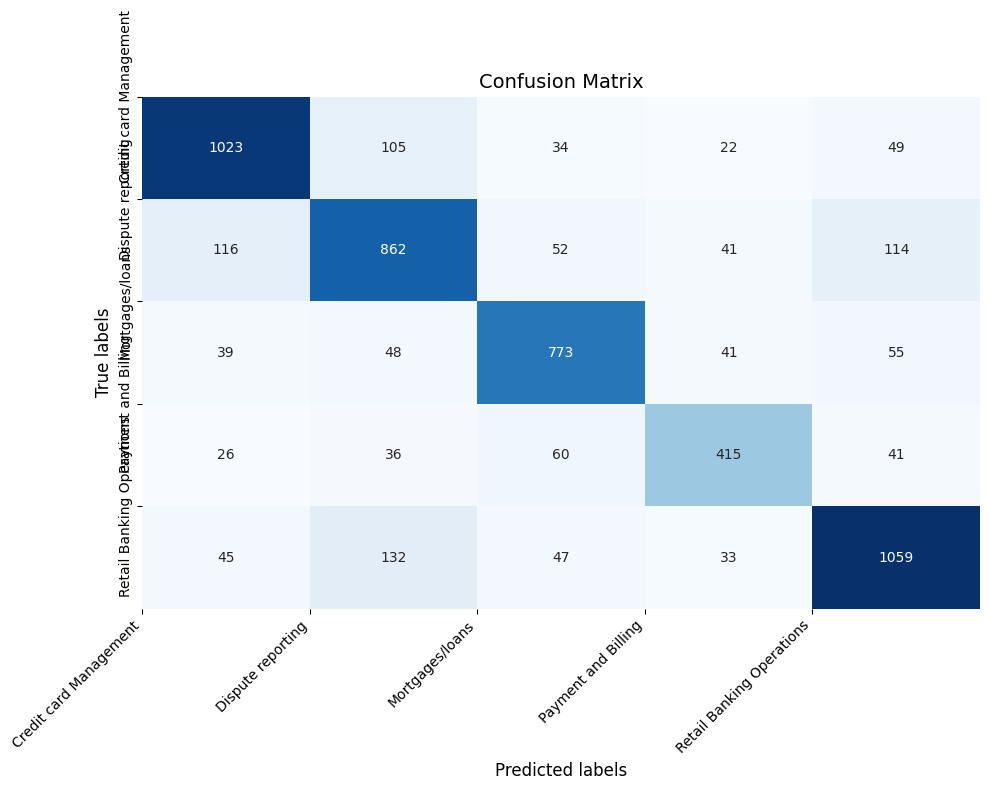

In [ ]:
plt.figure(figsize=(10, 8))  # Increase figure size

# Plot confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)

plt.xlabel('Predicted labels', fontsize=12)  # Increase label font size
plt.ylabel('True labels', fontsize=12)  # Increase label font size
plt.title('Confusion Matrix', fontsize=14)  # Increase title font size

class_names = ['Credit card Management', 'Dispute reporting', 'Mortgages/loans', 'Payment and Billing', 'Retail Banking Operations']
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45, ha='right', fontsize=10)  # Rotate and align x-axis tick labels
plt.yticks(tick_marks, class_names, fontsize=10)  # Increase y-axis tick label font size

# Show plot
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


3. Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42).fit(X_train, y_train)
rf.score(X_test, y_test)

0.8113135914958238

In [ ]:
y_pred = rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))

rf_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", rf_accuracy)

[[1058  104   11    5   55]
 [  85  946   15    5  134]
 [  47   23  831    9   46]
 [  84   62   99  243   90]
 [  49   55   15    1 1196]]
                           precision    recall  f1-score   support

   Credit card Management       0.80      0.86      0.83      1233
        Dispute reporting       0.79      0.80      0.80      1185
          Mortgages/loans       0.86      0.87      0.86       956
      Payment and Billing       0.92      0.42      0.58       578
Retail Banking Operations       0.79      0.91      0.84      1316

                 accuracy                           0.81      5268
                macro avg       0.83      0.77      0.78      5268
             weighted avg       0.82      0.81      0.80      5268

Accuracy: 0.8113135914958238


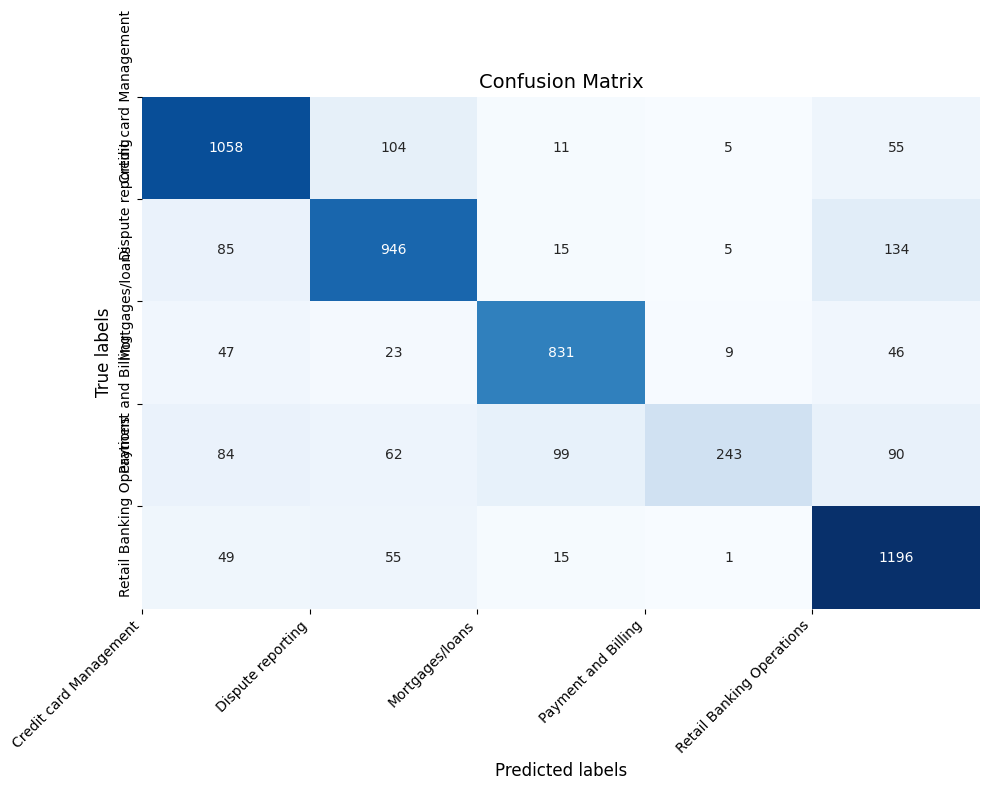

In [ ]:
plt.figure(figsize=(10, 8))  # Increase figure size

# Plot confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)

plt.xlabel('Predicted labels', fontsize=12)  # Increase label font size
plt.ylabel('True labels', fontsize=12)  # Increase label font size
plt.title('Confusion Matrix', fontsize=14)  # Increase title font size

class_names = ['Credit card Management', 'Dispute reporting', 'Mortgages/loans', 'Payment and Billing', 'Retail Banking Operations']
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45, ha='right', fontsize=10)  # Rotate and align x-axis tick labels
plt.yticks(tick_marks, class_names, fontsize=10)  # Increase y-axis tick label font size

# Show plot
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


4. SVM

In [ ]:
from sklearn.svm import LinearSVC
svm = LinearSVC(random_state=42).fit(X_train, y_train)
svm.score(X_test, y_test)

0.9151480637813212

In [ ]:
y_pred = svm.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))

svm_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", svm_accuracy)

[[1150   38   11   11   23]
 [  42 1063   16   10   54]
 [  24   17  872    5   38]
 [  17   15   21  507   18]
 [  22   50   11    4 1229]]
                           precision    recall  f1-score   support

   Credit card Management       0.92      0.93      0.92      1233
        Dispute reporting       0.90      0.90      0.90      1185
          Mortgages/loans       0.94      0.91      0.92       956
      Payment and Billing       0.94      0.88      0.91       578
Retail Banking Operations       0.90      0.93      0.92      1316

                 accuracy                           0.92      5268
                macro avg       0.92      0.91      0.91      5268
             weighted avg       0.92      0.92      0.92      5268

Accuracy: 0.9151480637813212


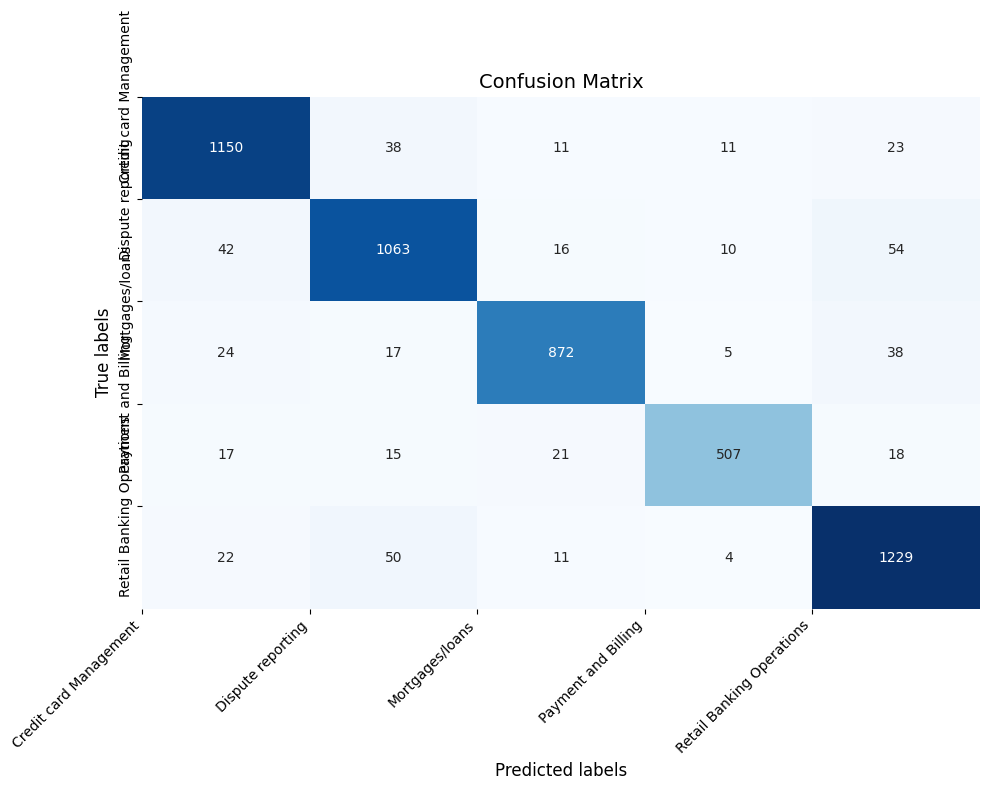

In [ ]:
plt.figure(figsize=(10, 8))  # Increase figure size

# Plot confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)

plt.xlabel('Predicted labels', fontsize=12)  # Increase label font size
plt.ylabel('True labels', fontsize=12)  # Increase label font size
plt.title('Confusion Matrix', fontsize=14)  # Increase title font size

class_names = ['Credit card Management', 'Dispute reporting', 'Mortgages/loans', 'Payment and Billing', 'Retail Banking Operations']
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45, ha='right', fontsize=10)  # Rotate and align x-axis tick labels
plt.yticks(tick_marks, class_names, fontsize=10)  # Increase y-axis tick label font size

# Show plot
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


5. Multinomial Naive Bayes


suitable for text classification tasks !

In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB().fit(X_train, y_train)
nb.score(X_test, y_test)

0.7186788154897494

In [ ]:
y_pred = nb.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))

nb_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", nb_accuracy)

[[ 941  164    5    0  123]
 [  52  950    7    0  176]
 [ 114   30  691    0  121]
 [ 198  109   90    4  177]
 [  62   50    4    0 1200]]
                           precision    recall  f1-score   support

   Credit card Management       0.69      0.76      0.72      1233
        Dispute reporting       0.73      0.80      0.76      1185
          Mortgages/loans       0.87      0.72      0.79       956
      Payment and Billing       1.00      0.01      0.01       578
Retail Banking Operations       0.67      0.91      0.77      1316

                 accuracy                           0.72      5268
                macro avg       0.79      0.64      0.61      5268
             weighted avg       0.76      0.72      0.68      5268

Accuracy: 0.7186788154897494


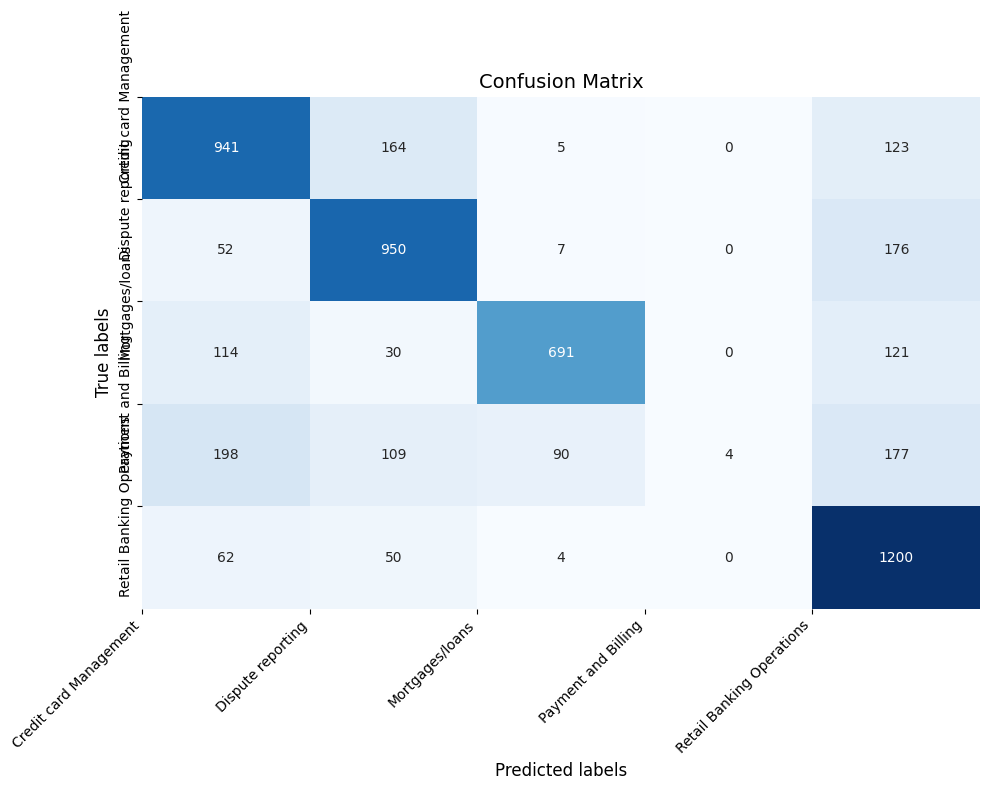

In [ ]:
plt.figure(figsize=(10, 8))  # Increase figure size

# Plot confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)

plt.xlabel('Predicted labels', fontsize=12)  # Increase label font size
plt.ylabel('True labels', fontsize=12)  # Increase label font size
plt.title('Confusion Matrix', fontsize=14)  # Increase title font size

class_names = ['Credit card Management', 'Dispute reporting', 'Mortgages/loans', 'Payment and Billing', 'Retail Banking Operations']
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45, ha='right', fontsize=10)  # Rotate and align x-axis tick labels
plt.yticks(tick_marks, class_names, fontsize=10)  # Increase y-axis tick label font size

# Show plot
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


6. Gradient Boosting Machines

powerful for text classification tasks.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=42).fit(X_train, y_train)
gb.score(X_test, y_test)

0.9045178435839029

In [ ]:
y_pred = gb.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))

gb_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", gb_accuracy)

[[1147   41    9   14   22]
 [  53 1025   23   14   70]
 [  19   25  871   18   23]
 [   7   17   29  509   16]
 [  29   49   18    7 1213]]
                           precision    recall  f1-score   support

   Credit card Management       0.91      0.93      0.92      1233
        Dispute reporting       0.89      0.86      0.88      1185
          Mortgages/loans       0.92      0.91      0.91       956
      Payment and Billing       0.91      0.88      0.89       578
Retail Banking Operations       0.90      0.92      0.91      1316

                 accuracy                           0.90      5268
                macro avg       0.90      0.90      0.90      5268
             weighted avg       0.90      0.90      0.90      5268

Accuracy: 0.9045178435839029


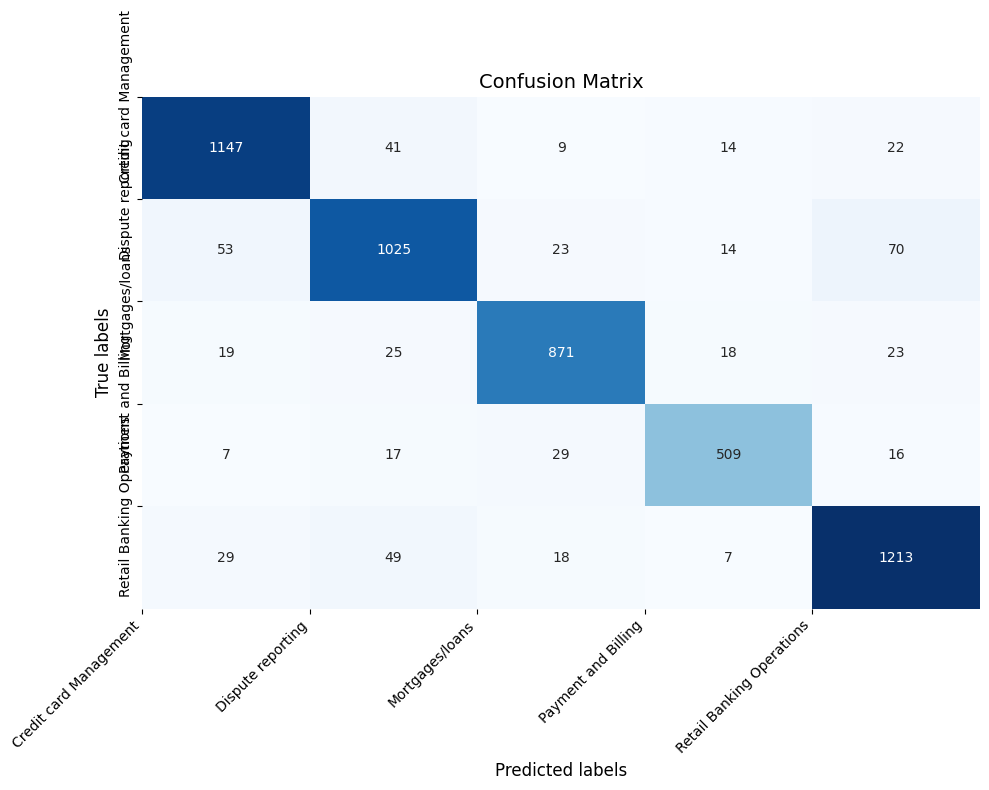

In [ ]:
plt.figure(figsize=(10, 8))  # Increase figure size

# Plot confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)

plt.xlabel('Predicted labels', fontsize=12)  # Increase label font size
plt.ylabel('True labels', fontsize=12)  # Increase label font size
plt.title('Confusion Matrix', fontsize=14)  # Increase title font size

class_names = ['Credit card Management', 'Dispute reporting', 'Mortgages/loans', 'Payment and Billing', 'Retail Banking Operations']
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45, ha='right', fontsize=10)  # Rotate and align x-axis tick labels
plt.yticks(tick_marks, class_names, fontsize=10)  # Increase y-axis tick label font size

# Show plot
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


7. XGBoost

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=len(set(y_train)), random_state=42)
xg = xgb_model.fit(X_train, y_train_encoded)

xg.score(X_test, y_test)

0.0

In [ ]:
xg.score(X_test, y_test_encoded)

0.9117312072892938

In [ ]:
y_pred = xg.predict(X_test)
cm = confusion_matrix(y_test_encoded, y_pred)
print(cm)
print(classification_report(y_test_encoded, y_pred))

xg_accuracy = accuracy_score(y_test_encoded, y_pred)
print("Accuracy:", xg_accuracy)

[[1140   44   13   14   22]
 [  46 1036   21   17   65]
 [  16   18  885   18   19]
 [   8   15   23  517   15]
 [  20   45   20    6 1225]]
              precision    recall  f1-score   support

           0       0.93      0.92      0.93      1233
           1       0.89      0.87      0.88      1185
           2       0.92      0.93      0.92       956
           3       0.90      0.89      0.90       578
           4       0.91      0.93      0.92      1316

    accuracy                           0.91      5268
   macro avg       0.91      0.91      0.91      5268
weighted avg       0.91      0.91      0.91      5268

Accuracy: 0.9117312072892938


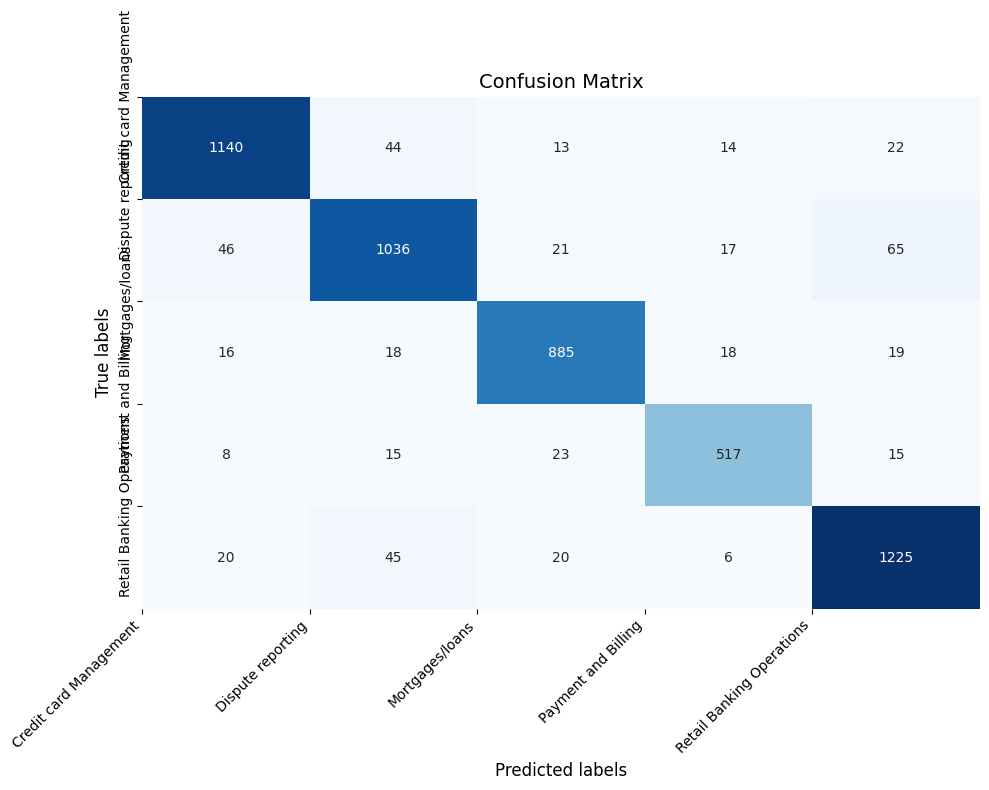

In [ ]:
plt.figure(figsize=(10, 8))  # Increase figure size

# Plot confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)

plt.xlabel('Predicted labels', fontsize=12)  # Increase label font size
plt.ylabel('True labels', fontsize=12)  # Increase label font size
plt.title('Confusion Matrix', fontsize=14)  # Increase title font size

class_names = ['Credit card Management', 'Dispute reporting', 'Mortgages/loans', 'Payment and Billing', 'Retail Banking Operations']
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45, ha='right', fontsize=10)  # Rotate and align x-axis tick labels
plt.yticks(tick_marks, class_names, fontsize=10)  # Increase y-axis tick label font size

# Show plot
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


# ACCURACY visualisation

In [ ]:
from tabulate import tabulate

accuracies = [
    ("Logistic Regression", logreg_accuracy),
    ("Decision Tree", dt_accuracy),
    ("Random Forest", rf_accuracy),
    ("SVM", svm_accuracy),
    ("Multinomial Naive Bayes",nb_accuracy),
    ("Gradient Boosting Machines",gb_accuracy),
    ("XGBoost",xg_accuracy)
]


print(tabulate(accuracies, headers=["Model", "Accuracy"], tablefmt="grid"))


+----------------------------+------------+
| Model                      |   Accuracy |
+============================+============+
| Logistic Regression        |   0.919894 |
+----------------------------+------------+
| Decision Tree              |   0.784358 |
+----------------------------+------------+
| Random Forest              |   0.811314 |
+----------------------------+------------+
| SVM                        |   0.915148 |
+----------------------------+------------+
| Multinomial Naive Bayes    |   0.718679 |
+----------------------------+------------+
| Gradient Boosting Machines |   0.904518 |
+----------------------------+------------+
| XGBoost                    |   0.911731 |
+----------------------------+------------+


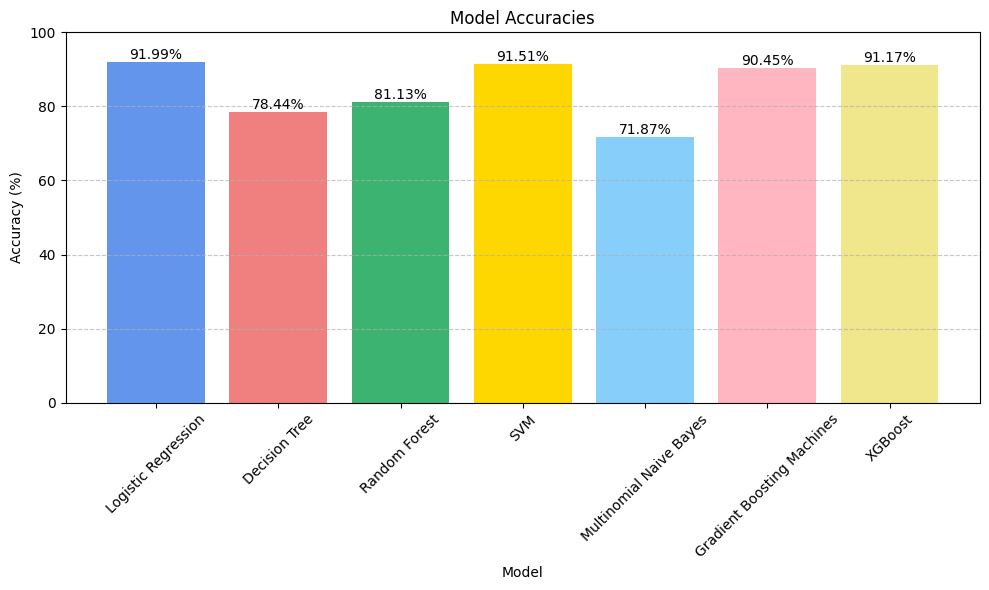

In [ ]:
import matplotlib.pyplot as plt

models = ["Logistic Regression", "Decision Tree", "Random Forest", "SVM", "Multinomial Naive Bayes", "Gradient Boosting Machines","XGBoost"]

accuracies = [logreg_accuracy, dt_accuracy, rf_accuracy, svm_accuracy, nb_accuracy, gb_accuracy,xg_accuracy]

accuracies_percent = [accuracy * 100 for accuracy in accuracies]

colors = ['cornflowerblue', 'lightcoral', 'mediumseagreen', 'gold', 'lightskyblue', 'lightpink', 'khaki', 'blue']


plt.figure(figsize=(10, 6))
bars = plt.bar(models, accuracies_percent, color=colors)
plt.title('Model Accuracies')
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)


for bar, accuracy in zip(bars, accuracies_percent):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{accuracy:.2f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# HYPERPARAMETER TUNING - dept model

THE BEST MODEL IS "Logistic Regression"

so we can tune it further.

In [ ]:
from sklearn.model_selection import GridSearchCV

logreg_grid = {
    "C": [100, 10, 5, 4, 3, 2, 1, 1.0, 0.1, 0.01],
    "solver": ["liblinear", "newton-cg", "lbfgs", "sag", "saga"]
}

logreg_hpt = GridSearchCV(
    estimator=LogisticRegression(random_state=42),
    param_grid=logreg_grid,
    cv=5,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)


logreg_hpt.fit(X_train, y_train)
logreg_hpt.best_params_

Fitting 5 folds for each of 50 candidates, totalling 250 fits


{'C': 5, 'solver': 'saga'}

In [ ]:
y_pred = logreg_hpt.predict(X_test)
final_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", final_accuracy)

Accuracy: 0.9265375854214123
